<a href="https://colab.research.google.com/github/poojasaxena/tensorflow-developer-zertificate-coursera/blob/main/running_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%autosave 30

Autosaving every 30 seconds


# Download Dataset from Kaggle

## Setting up logger

In [2]:
import logging
logging.basicConfig(format='%(levelname)s:%(asctime)s: %(message)s',datefmt='%I:%M:%S %p',
                    level=logging.INFO)
logger= logging.getLogger('test-logger')
logger.disabled=False
logger.info(f"logger {logger} has Disable::{logger.disabled}")

INFO:03:52:45 PM: logger <Logger test-logger (INFO)> has Disable::False


## in Google colab
* use this [reference](https://www.kaggle.com/general/74235)

In [3]:
#from google.colab import files
#files.upload()

In [4]:
 #! kaggle datasets list | grep 'cat'

In [5]:
#! kaggle competitions download -c "dogs-vs-cats"

## in Jupyter-notebook

In [6]:
import os
import string
import shutil

base_dir = "/tmp/dogs_vs_cats/"

fresh_start = input("Do you want to fresh start with downloading dataset? ").upper()

if "YES" in fresh_start:
    if not os.path.exists(base_dir):
        logger.error(f"The path {base_dir} does not exist.")
    else:
        logger.warning(f'Clearning {base_dir}, as you asked for!')
        shutil.rmtree(base_dir)
        logger.info("You are ready for fresh start!!")
else:
    logger.info('Enjoy working non-fresh!')

Do you want to fresh start with downloading dataset? yes


INFO:03:53:00 PM: You are ready for fresh start!!


In [7]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile 

def upload_kaggle_dataset(kaggle_dataset_name, base_dir_name):
    if os.path.exists(base_dir_name):
        logger.info(f"Dataset {kaggle_dataset_name} is avalable in {base_dir_name} with content: \n {os.listdir(base_dir_name)}")
        return
    else:
        logger.debug("Authenticating kaggle API======")
        api=KaggleApi()
        api.authenticate()
        api.competition_download_files(kaggle_dataset_name)
    
        logger.debug("Authenticated, downloading Dataset =======")
        with zipfile.ZipFile(kaggle_dataset_name+'.zip', mode='r') as zip_ref:
            zip_ref.extractall(base_dir_name)
            zip_ref.close()
        logger.info(f"Dataset {kaggle_dataset_name} is downloaded in {base_dir_name} with content: \n {os.listdir(base_dir_name)}")

In [8]:
## Lets download the kaggle dataset
kaggle_dataset_name = "dogs-vs-cats"
upload_kaggle_dataset(kaggle_dataset_name, base_dir_name=base_dir)

INFO:03:53:02 PM: Dataset dogs-vs-cats is downloaded in /tmp/dogs_vs_cats/ with content: 
 ['sampleSubmission.csv', 'test1.zip', 'train.zip']


In [9]:
## unzipped train/test directories
def unzip_sub_directories(train_zip_name, test_zip_name, base_dir_name):
    
    global unzip_train_dir,unzip_test_dir
    
    unzip_train_dir = os.path.join(base_dir, train_zip_name.split('.')[0])
    unzip_test_dir = os.path.join(base_dir, test_zip_name.split('.')[0])

    if os.path.exists(unzip_train_dir) and os.path.exists(unzip_test_dir):
        logger.warning(f'Unzipped directory of train/test exists in {base_dir_name}: \n {os.listdir(base_dir_name)}')
        return
    else:
        logger.info(f'Unzipping train/test directory in {base_dir_name} ======')

        ## Lets unzip the train/test zip files
        for zipped in [os.path.join(base_dir, train_zip_name), os.path.join(base_dir, test_zip_name)]:
            with zipfile.ZipFile(zipped, mode='r') as zip_ref:
                zip_ref.extractall(base_dir_name)
            zip_ref.close()
        
        logger.info(f'Finished, dataset exists in {base_dir_name} : \n {os.listdir(base_dir_name)}') 

In [10]:
## lets unzip our test/train zip file name, in case they are not

## assign the train/test zip names 
sample,test_zip, train_zip = os.listdir(base_dir)

## unzip the train/test 
unzip_sub_directories(train_zip, test_zip, base_dir_name=base_dir)

INFO:03:53:02 PM: Unzipping train/test directory in /tmp/dogs_vs_cats/ ======
INFO:03:53:14 PM: Finished, dataset exists in /tmp/dogs_vs_cats/ : 
 ['sampleSubmission.csv', 'test1', 'test1.zip', 'train', 'train.zip']


In [11]:
## dataset directory : /tmp/dogs_vs_cats/training/cat&dog vs /tmp/dogs_vs_cat/validation/cat&dog

def create_dataset_structure(dir_name=[], sub_dir_name=[]):
        
    global train_dir, validation_dir, train_cats_dir,train_dogs_dir,validation_cats_dir, validation_dogs_dir
    
    train_dir = os.path.join(base_dir, dir_name[0])
    validation_dir = os.path.join(base_dir, dir_name[1])
    
    # Directory with our training cat/dog pictures
    train_cats_dir = os.path.join(train_dir, sub_dir_name[0])
    train_dogs_dir = os.path.join(train_dir, sub_dir_name[1])

    # Directory with our validation cat/dog pictures
    validation_cats_dir = os.path.join(validation_dir, sub_dir_name[0])
    validation_dogs_dir = os.path.join(validation_dir, sub_dir_name[1])

    if os.path.exists(train_dir) and os.path.exists(validation_dir):
        logger.warning(f"Training and validation directory already exist at: \n {train_cats_dir}, {train_dogs_dir} \n {validation_cats_dir} {validation_dogs_dir} \n Existing!!")
        return
    else:
        ## Create all directories
        os.mkdir(train_dir)
        os.mkdir(validation_dir)
        os.mkdir(train_cats_dir)
        os.mkdir(train_dogs_dir)
        os.mkdir(validation_cats_dir)
        os.mkdir(validation_dogs_dir)
        logger.info(f'Training data directory is created \n {train_cats_dir} & {train_dogs_dir} \n validation data directory is created {validation_cats_dir} & {validation_dogs_dir}')

In [12]:
create_dataset_structure(dir_name = ['training','validation'], sub_dir_name=['cats', 'dogs'])

INFO:03:53:14 PM: Training data directory is created 
 /tmp/dogs_vs_cats/training/cats & /tmp/dogs_vs_cats/training/dogs 
 validation data directory is created /tmp/dogs_vs_cats/validation/cats & /tmp/dogs_vs_cats/validation/dogs


In [13]:
import random
def pre_process_data():
    
    if not os.path.exists(unzip_train_dir):
        logger.error(f"The path {unzip_train_dir} does not exist.")
        return
    
    if len(os.listdir(unzip_train_dir)) ==0:
        logger.warning(f"There are {len(os.listdir(unzip_train_dir))} dataset in unzip_train_dir to copy.")
        logger.info(f"There are already {len(os.listdir(train_dogs_dir))} dogs examples in {train_dogs_dir} & \n there are {len(os.listdir(train_cats_dir))} cats example in {train_cats_dir}")
        return

    for fname in os.listdir(unzip_train_dir):
        ## first dogs data
        if fname.startswith("dog"):
            os.replace(os.path.join(unzip_train_dir, fname), os.path.join(train_dogs_dir, fname))
        
        ## now cats data
        if fname.startswith("cat"):
            os.replace(os.path.join(unzip_train_dir, fname), os.path.join(train_cats_dir, fname))
    
    logger.info(f'Finished moving the file. There are {len(os.listdir(train_dogs_dir))} dogs examples in {train_dogs_dir}')
    logger.info(f'& there are {len(os.listdir(train_cats_dir))} cats example in {train_cats_dir}')


In [14]:
pre_process_data()

INFO:03:53:22 PM: Finished moving the file. There are 12500 dogs examples in /tmp/dogs_vs_cats/training/dogs
INFO:03:53:22 PM: & there are 12500 cats example in /tmp/dogs_vs_cats/training/cats


In [17]:
def prepare_validation_dataset(split_dataset_percentage):
    
    ## Dogs Dataset
    # list all files in dir that are jpg image
    dog_files = [f for f in os.listdir(train_dogs_dir) if f.endswith('jpg') & f.startswith("dog")]
    logger.info(f"Out of {int(len(os.listdir(train_dogs_dir)))} dogs images in {train_dogs_dir}, {int(len(dog_files)*float(split_dataset_percentage))} will be moved to {validation_dogs_dir}")

    # select a percent of the files randomly 
    random_dog_files = random.sample(dog_files, int(len(dog_files)*split_dataset_percentage))

    # move the randomly selected images by renaming directory 
    for random_file_name in random_dog_files:      
        #logger.debug(train_dogs_dir+'/'+random_file_name, validation_dogs_dir+'/'+random_file_name)
        os.replace(train_dogs_dir+'/'+random_file_name, validation_dogs_dir+'/'+random_file_name) 
        continue
        
    ### CATs dataset
    cat_files = [f for f in os.listdir(train_cats_dir) if f.endswith('jpg') & f.startswith("cat")]
    logger.info(f"Out of {int(len(os.listdir(train_cats_dir)))} cats images in {train_cats_dir}, {int(len(cat_files)*float(split_dataset_percentage))} will be moved to {validation_cats_dir}")
    random_cats_files = random.sample(cat_files, int(len(cat_files)*split_dataset_percentage))
    for random_file_name in random_cats_files:      
        os.replace(train_cats_dir+'/'+random_file_name, validation_cats_dir+'/'+random_file_name) 
        continue

    logger.info(f"Splitting is performed. There are {len(os.listdir(validation_cats_dir))} cats images in {validation_cats_dir} \n and {len(os.listdir(validation_dogs_dir))} dog images in {validation_dogs_dir}")

In [18]:
prepare_validation_dataset(0.2)

INFO:03:53:53 PM: Out of 12500 dogs images in /tmp/dogs_vs_cats/training/dogs, 2500 will be moved to /tmp/dogs_vs_cats/validation/dogs
INFO:03:53:56 PM: Out of 12500 cats images in /tmp/dogs_vs_cats/training/cats, 2500 will be moved to /tmp/dogs_vs_cats/validation/cats
INFO:03:53:58 PM: Splitting is performed. There are 2500 cats images in /tmp/dogs_vs_cats/validation/cats 
 and 2500 dog images in /tmp/dogs_vs_cats/validation/dogs


In [ ]:
## Lets check the images
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

In [ ]:
pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in os.listdir(train_cats_dir)[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in os.listdir(train_dogs_dir)[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Model definition

In [19]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [20]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    ## layer 01
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    ## layer 02
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    ## layer 03
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    ## layer 04
    tf.keras.layers.Flatten(), 
    # layer 05
    tf.keras.layers.Dense(512, activation='relu'), 
    ## layer 06
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

2021-09-27 15:54:08.373537: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [23]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_steps=50,
                              verbose=2)

2021-09-27 15:54:22.112099: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
100/100 - 18s - loss: 0.8761 - accuracy: 0.5455 - val_loss: 0.6604 - val_accuracy: 0.6210
Epoch 2/20
100/100 - 18s - loss: 0.6700 - accuracy: 0.6210 - val_loss: 0.6075 - val_accuracy: 0.6830
Epoch 3/20
100/100 - 18s - loss: 0.6346 - accuracy: 0.6635 - val_loss: 0.5971 - val_accuracy: 0.6830
Epoch 4/20
100/100 - 19s - loss: 0.5863 - accuracy: 0.7100 - val_loss: 0.5700 - val_accuracy: 0.6980
Epoch 5/20
100/100 - 19s - loss: 0.5888 - accuracy: 0.6885 - val_loss: 0.5743 - val_accuracy: 0.7080
Epoch 6/20
100/100 - 18s - loss: 0.5674 - accuracy: 0.6985 - val_loss: 0.5484 - val_accuracy: 0.7480
Epoch 7/20
100/100 - 18s - loss: 0.5440 - accuracy: 0.7250 - val_loss: 0.5501 - val_accuracy: 0.7250
Epoch 8/20
100/100 - 18s - loss: 0.5146 - accuracy: 0.7415 - val_loss: 0.5109 - val_accuracy: 0.7740
Epoch 9/20
100/100 - 19s - loss: 0.5239 - accuracy: 0.7555 - val_loss: 0.5040 - val_accuracy: 0.7620
Epoch 10/20
100/100 - 21s - loss: 0.4972 - accuracy: 0.7650 - val_loss: 0.4737 - val_accura

## Plotting

In [24]:
import sys
print(sys.path)
sys.path.append("/Users/psaxena/Documents/weitebildung/tensorflow-developer-zertificate-coursera/pool_common_scripts")

['/Users/psaxena/Documents/weitebildung/tensorflow-developer-zertificate-coursera/course2_convolutional-neural-networks-tensorflow/09_working_application', '/usr/local/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/usr/local/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/usr/local/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/psaxena/Library/Python/3.9/lib/python/site-packages', '/usr/local/lib/python3.9/site-packages', '/usr/local/lib/python3.9/site-packages/IPython/extensions', '/Users/psaxena/.ipython']


Help on function plot_n_model in module ploting_script:

plot_n_model(num_history=2, name_history=[], ylim_low=0.4, ylim_high=1.0, label_list=[], leg_loc='lower left', is_sparse_categorical=False, is_saved_history=False)
    num_history  : no of history to be plotted
    name_history : list of history name, ex [history_1, history_2]
    label_list   : list of label names, ex ['simple_model', 'model_cnn']
    y_lim_low    : lowest y scale
    y_lim_high   : highest y scale
    leg_loc      : location of legend ex: 'lower left', 'lower right', 'upper right', 'upper left'
    is_sparse_categorical : True, if sparse_categorical_accuracy is being used. 
    is_saved_history : if plotting saved history via pickle
    
                     @@ Saving part--
                     try:
                       import dill as pickle
                     except ImportError:
                        import pickle
                     with open('trainHistoryDict', 'wb') as file_pi:
                     

<Figure size 432x288 with 0 Axes>

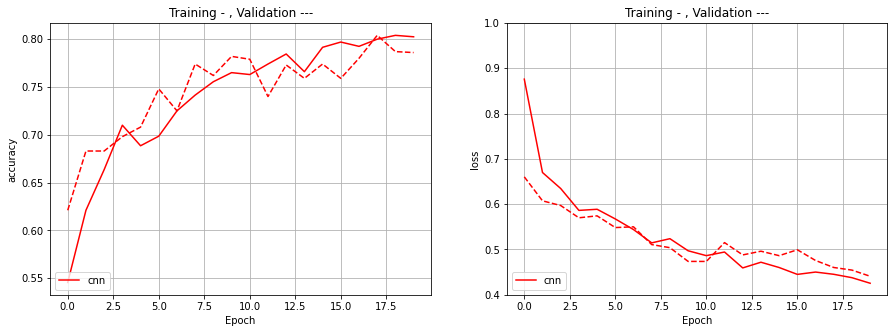

In [25]:
from ploting_script import plot_n_model
plot_n_model(num_history=1, name_history=[history], label_list=["cnn"])

## Testing

In [26]:
## Testing on uploaded images
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

ModuleNotFoundError: No module named 'google.colab'